In [5]:
import pandas as pd

In [1]:
!pip install wordcloud

In [2]:
import csv
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [11]:
df = pd.read_csv("tweetscorona1909.csv")

In [12]:
df = pd.DataFrame(df) 
df.head(20)

,created_at,text
0,Sun Sep 20 00:15:39 +0000 2020,devo ter ficado maior nessa quarentena sla uns...
1,Sun Sep 20 00:15:39 +0000 2020,@BralLM: Saudades de uma aglomeração né minha...
2,Sun Sep 20 00:15:39 +0000 2020,@LunnaGhenyfer: Queriaaa 😏❤️❤️
3,Sun Sep 20 00:15:40 +0000 2020,@blanchetheron: a bunda
4,Sun Sep 20 00:15:40 +0000 2020,@Oficialluizlima: Até quando o Rio de Janeiro...
5,Sun Sep 20 00:15:41 +0000 2020,@haliaxes: kkkkkkkkkkkkkkkkk coragem gravar n...
6,Sun Sep 20 00:15:41 +0000 2020,@blanchetheron: a bunda
7,Sun Sep 20 00:15:41 +0000 2020,@rosanajuan12 😂😂😂😂😂😂😂😂😂 o rio de janeiro conti...
8,Sun Sep 20 00:15:42 +0000 2020,"#homaodaporra💕 em Tijuca, Rio De Janeiro, Braz..."
9,Sun Sep 20 00:15:43 +0000 2020,@BTS_Noticee: [👑🧨] ㅁ ㅡ @BTS_twt ㅡ ㅁ\n\n📇🚏Múco...


In [13]:
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

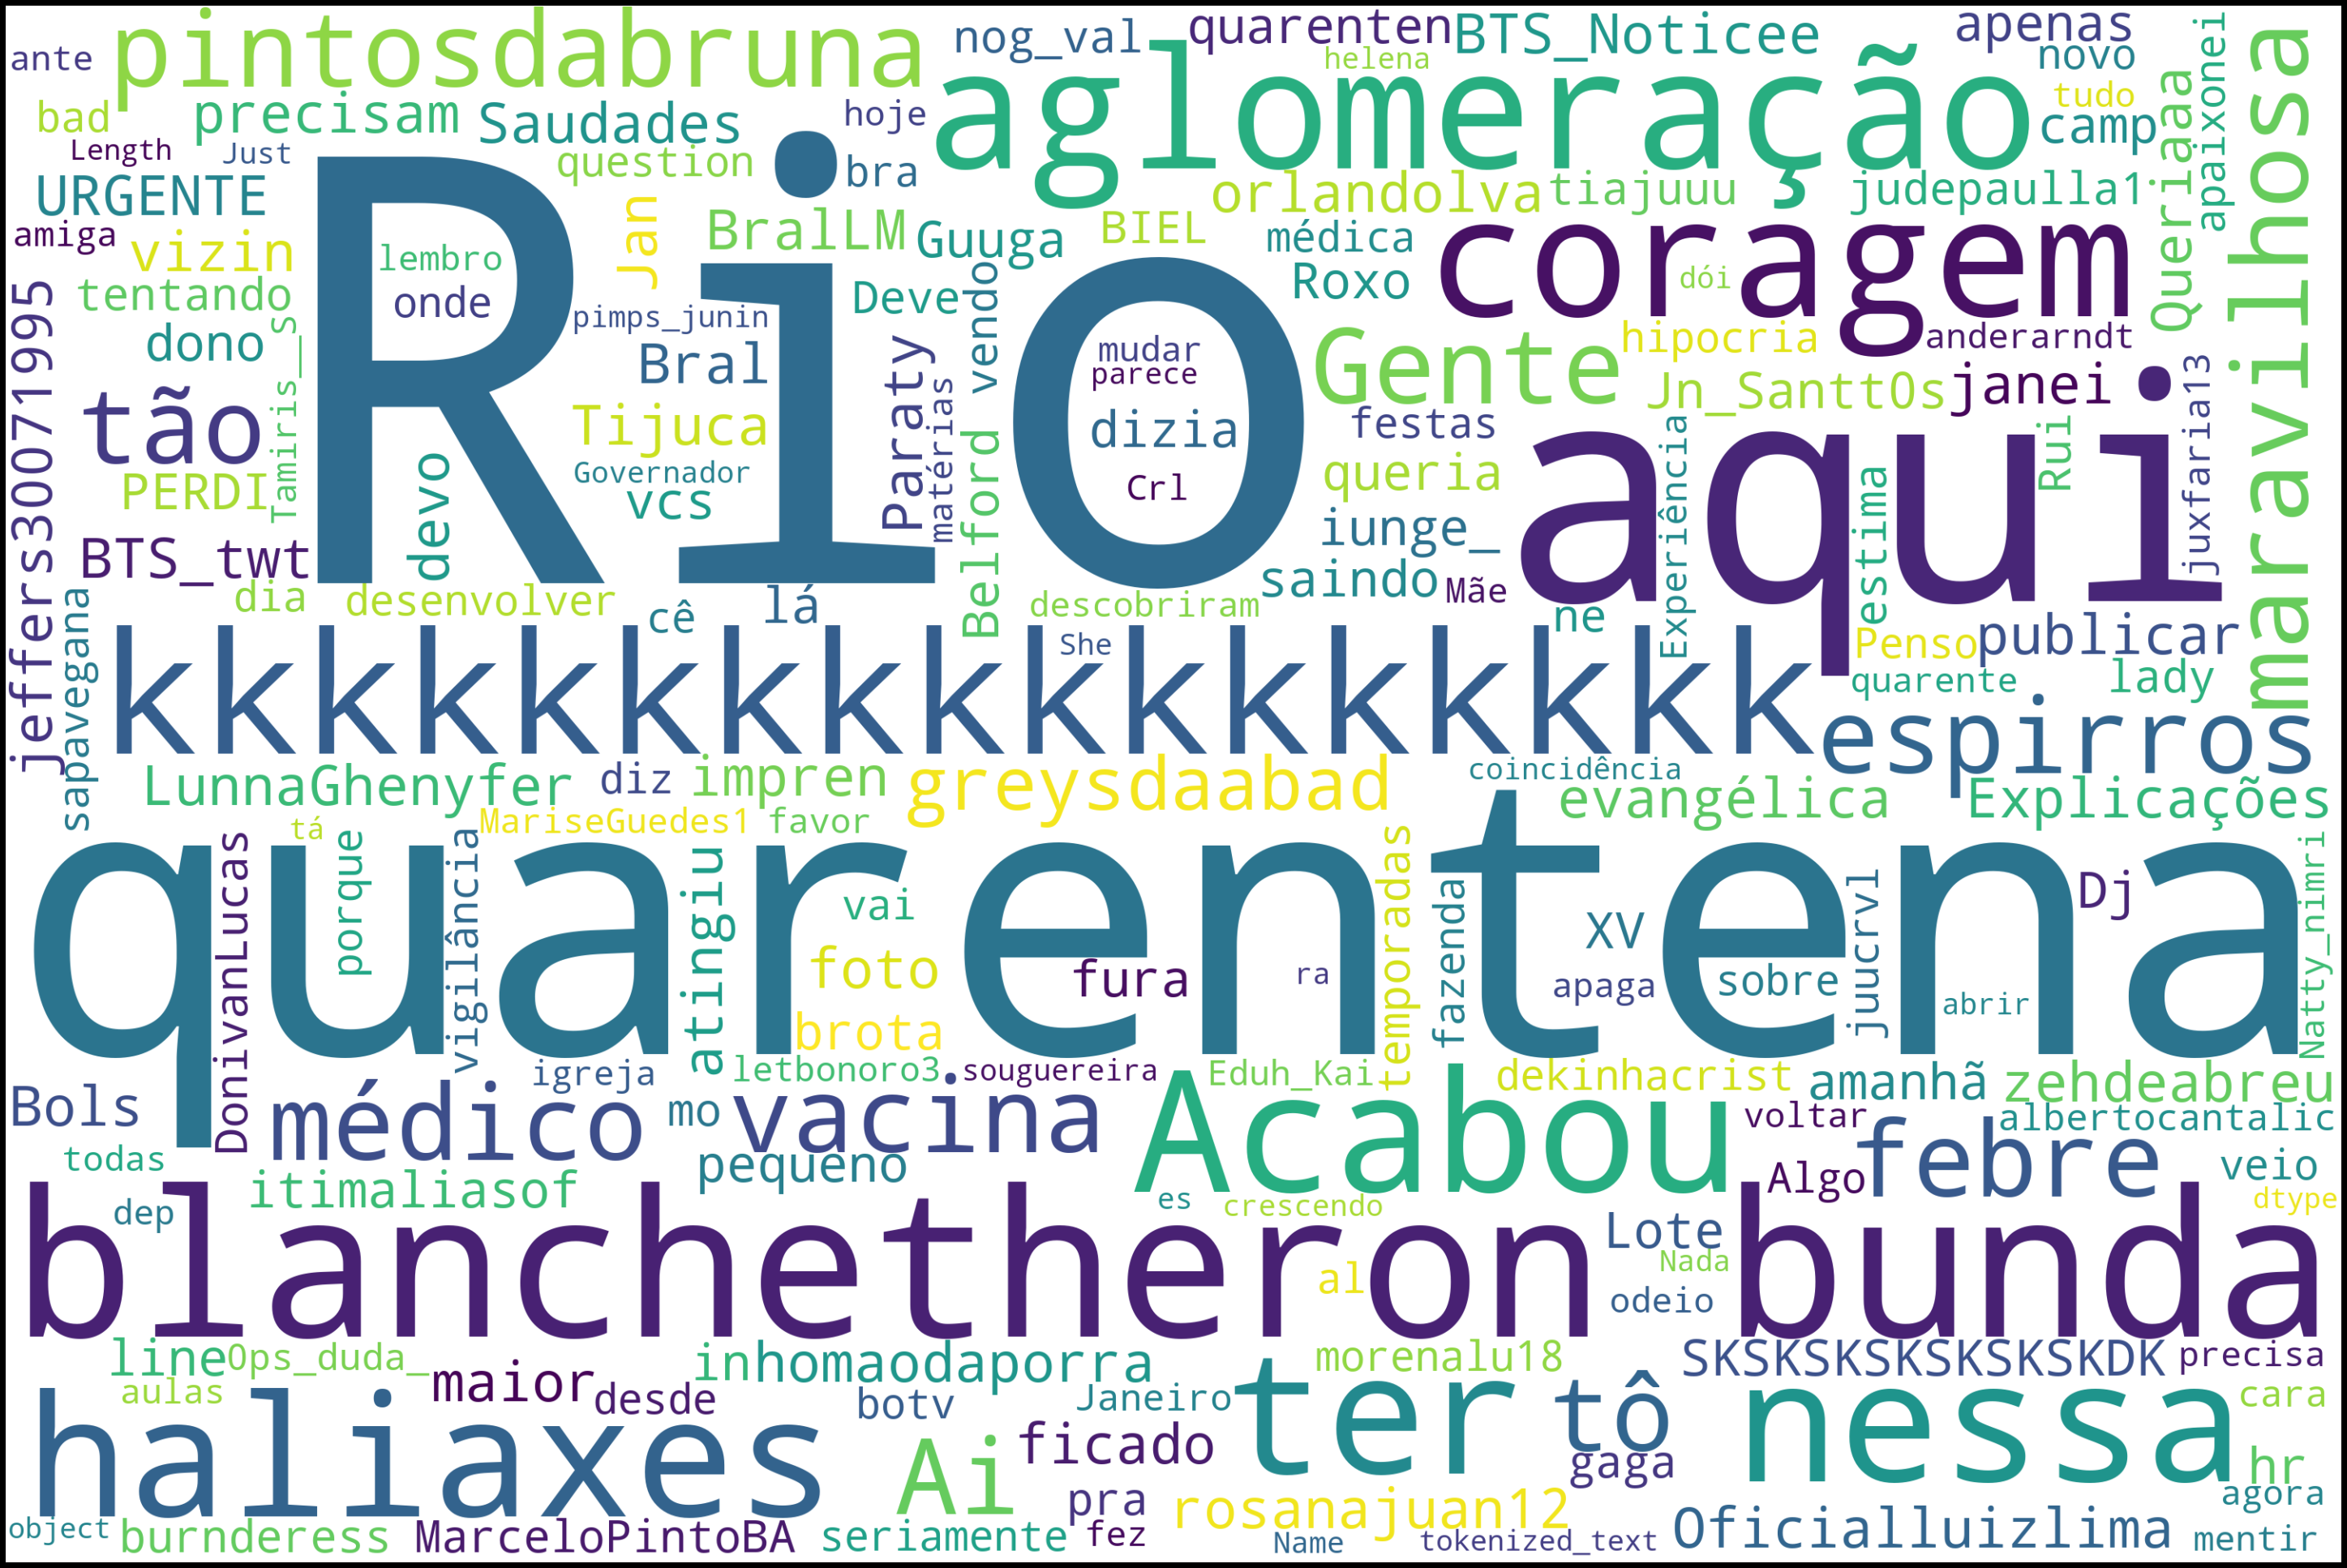

In [14]:
text = df.tokenized_text
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud-tweets1909.png', format='png')
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import toolz as fp
import nltk 
#import nltk
import warnings
# configuration
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'svg' 
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')
nltk.download('rslp')
nltk.download('stopwords');

[nltk_data] Downloading package rslp to
[nltk_data]     /Users/carolbragamacbook/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/carolbragamacbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# separa em palavras
tweet_words = nltk.tokenize.word_tokenize(df["text"].drop_duplicates().str.lower().str.cat(sep=" "))

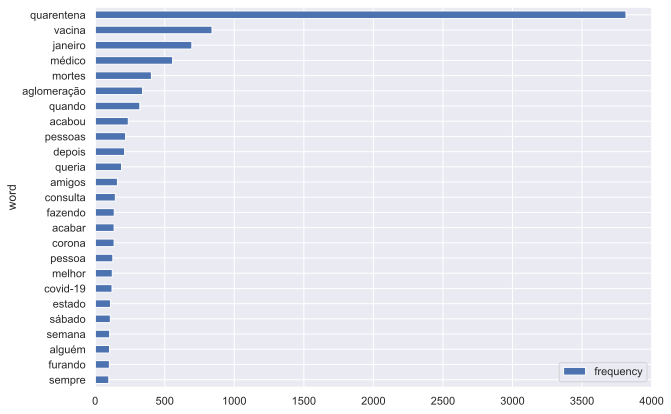

In [17]:
#Biblioteca nltk, palavras mais frequentes dos tweets; 
#25 palavras (com mais de 3 caracteres) mais frequentes.

word_dist = fp.pipe(fp.keyfilter(lambda x: len(x) > 5, nltk.FreqDist(tweet_words)),
                    nltk.probability.FreqDist)

fig, ax = plt.subplots(figsize=(10, 7))

(pd.DataFrame(word_dist.most_common(25)[::-1],
              columns=['word', 'frequency'])
    .plot.barh(x="word", y="frequency", ax=ax));

In [19]:
df2 = pd.DataFrame(word_dist.most_common(35)[::-1])

In [20]:
df2

,0,1
0,primeira,77
1,ninguém,77
2,saindo,78
3,falando,80
4,também,80
5,publicar,80
6,parece,83
7,durante,92
8,pandemia,93
9,porque,95


(-0.5, 2999.5, 1999.5, -0.5)

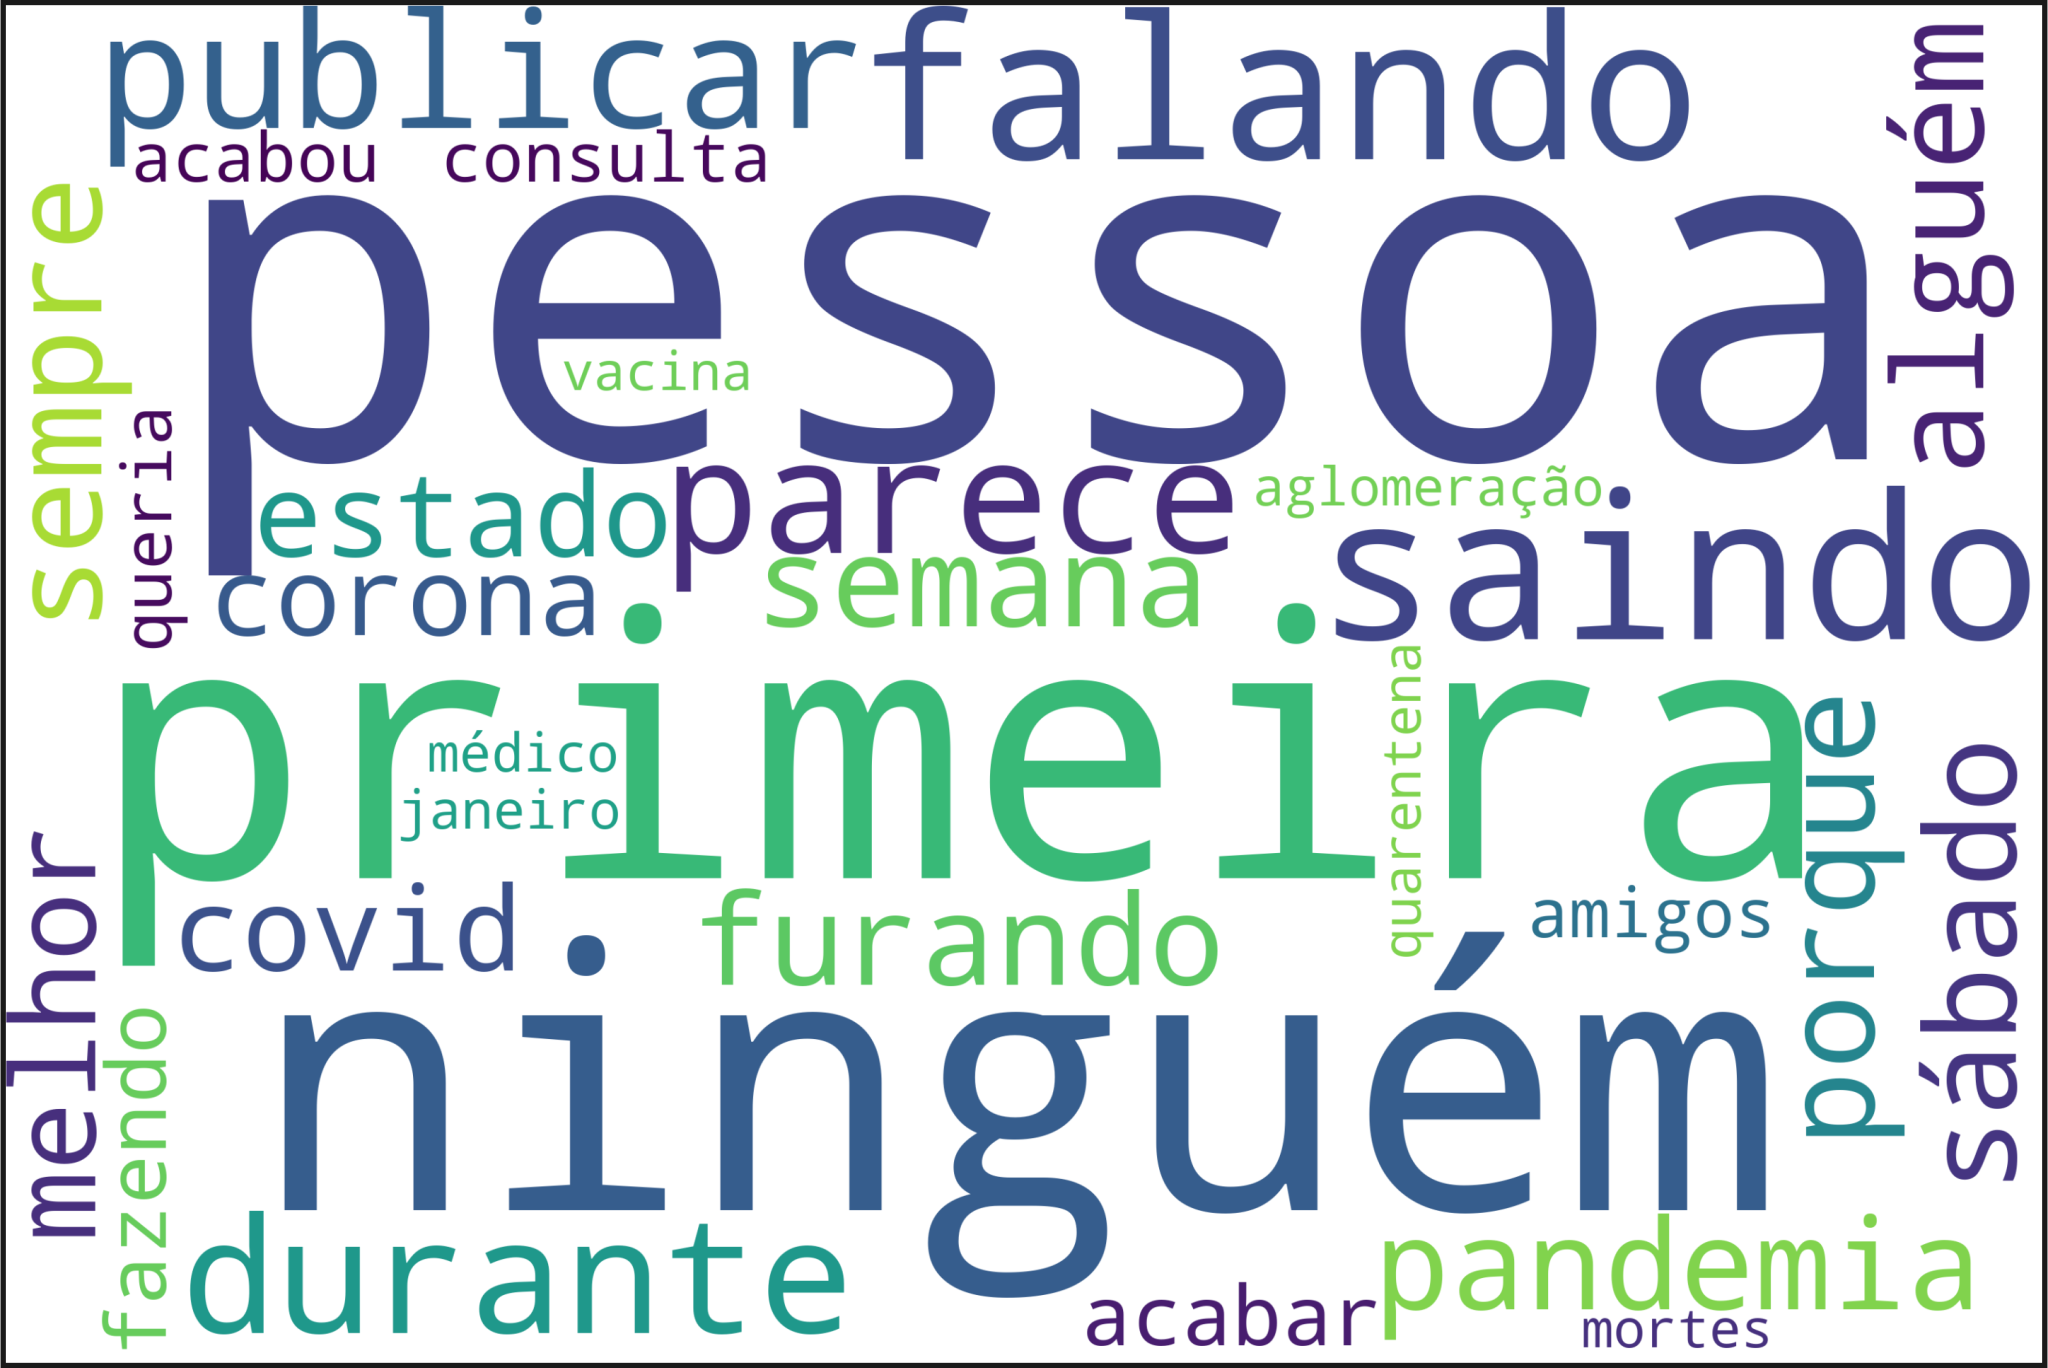

In [21]:
text = df2
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords=stopwords).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('wordcloud-freqterm-nova.png', format='png')
plt.show()

In [22]:
df2.count()

0    35
1    35
dtype: int64